In [1]:
# https://huggingface.co/intfloat/multilingual-e5-large/tree/main#/
import os
# OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5md.dll already initialized.
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import torch.nn.functional as F

import numpy as np
from torch import Tensor
from transformers import AutoTokenizer, AutoModel




# 将“query：”和“passage：”对非对称任务相应地使用，例如开放式QA中的段落检索、临时信息检索。
# 对称任务使用“query：”前缀，例如语义相似性、双文本挖掘、释义检索。
# 如果要将嵌入用作特征，请使用“query：”前缀，例如线性探测分类、聚类。
# Each input text should start with "query: " or "passage: ", even for non-English texts.
# For tasks other than retrieval, you can simply use the "query: " prefix.
input_texts = [
    # '先生',"男人","父亲","男","帅哥","小伙",
#  '女士',"女人", "母亲 ","女","美女","姑娘"
"男孩","兄弟","爸爸","皇帝","父亲","绅士","爷爷","孙子","新郎","丈夫","国王","男人","先生","先生","侄子","王子","先生","儿子","继父","叔叔",
"女孩","姐妹","妈妈","皇后","母亲","女士","奶奶","孙女","新娘","妻子","女王","女人","小姐","女士","侄女","公主","夫人","女儿","继母","阿姨"
]


tokenizer = AutoTokenizer.from_pretrained('intfloat/multilingual-e5-large')
model = AutoModel.from_pretrained('intfloat/multilingual-e5-large')

/home/queziaa/anaconda3/envs/we/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

In [31]:

# Tokenize the input texts
batch_dict = tokenizer(input_texts, max_length=512, padding=True, truncation=True, return_tensors='pt')
# batch_dict.keys()  dict_keys(['input_ids', 'attention_mask'])
# batch_dict['input_ids'].shape  torch.Size([46, 5])
# batch_dict['attention_mask'].shape  # torch.Size([46, 5])
# tensor([[     0,      6,  72853,      2,      1],
#         [     0,      6,  49790,      2,      1],
#         [     0,      6,  35023,      2,      1],
#         [     0,      6, 180883,      2,      1],
# batch_dict['attention_mask']
# tensor([[1, 1, 1, 1, 0],
#         [1, 1, 1, 1, 0],

outputs = model(**batch_dict)

def average_pool(last_hidden_states: Tensor, attention_mask: Tensor) -> Tensor:
    last_hidden = last_hidden_states.masked_fill(~attention_mask[..., None].bool(), 0.0)
    return last_hidden.sum(dim=1) / attention_mask.sum(dim=1)[..., None]
embeddings = average_pool(outputs.last_hidden_state, batch_dict['attention_mask'])

# normalize embeddings
embeddings = F.normalize(embeddings, p=2, dim=1)  #torch.Size([40, 1024])

In [33]:
embeddings.shape


torch.Size([40, 1024])

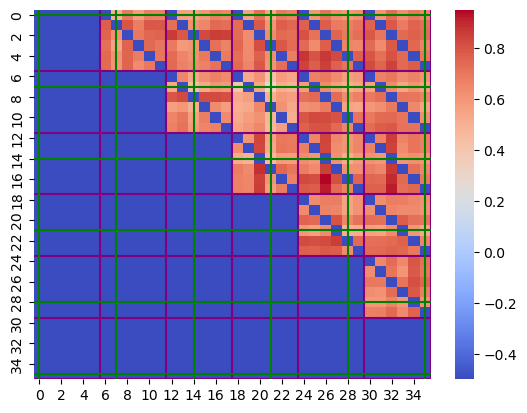

[10, 38, 28, 72, 164, 3, 0, 12, 40, 4, 17, 80, 11, 20, 108]
[2, 2, 7, 7, 7, 11, 13, 20, 29, 30, 61, 68, 95, 150]


In [3]:
import Hlib


for i,j in vector_modes.items():
    print(i,j)

for i,j in diff_modes.items():
    print(i,j)

out,nonSample,trSample = Hlib.plt_seaborn(embeddings,6)

ordered_positions = Hlib.find_ordered_positions(nonSample, trSample)

print(ordered_positions)
